In [2]:
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib
from api_keys import api_key
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'San Francisco, CA'
SEARCH_LIMIT = 50

In [4]:
def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.

    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.

    Returns:
        dict: The JSON response from the request.

    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

In [5]:
def get_businesses(location, term, queries, api_key):
    headers = {'Authorization': 'Bearer %s' % api_key}
    url = 'https://api.yelp.com/v3/businesses/search'
    data = []
    for offset in range(0, queries, 50):
        params = {
            'limit': 50,
            'location': location.replace(' ', '+'),
            'term': term.replace(' ', '+'),
            'offset': offset
        }
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
        elif response.status_code == 400:
            print('400 Bad Request')
            break
    return data

In [6]:

queries=100
response=get_businesses("Toronto", "restaurants", queries, api_key)
response

[{'id': 'r_BrIgzYcwo1NAuG9dLbpg',
  'alias': 'pai-northern-thai-kitchen-toronto-5',
  'name': 'Pai Northern Thai Kitchen',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/9QruaHywVEtolW9ELorHpA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=X_A757f4EgOJXDpBLUmPNA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=X_A757f4EgOJXDpBLUmPNA',
  'review_count': 3336,
  'categories': [{'alias': 'thai', 'title': 'Thai'}],
  'rating': 4.5,
  'coordinates': {'latitude': 43.64784, 'longitude': -79.38872},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '18 Duncan Street',
   'address2': '',
   'address3': '',
   'city': 'Toronto',
   'zip_code': 'M5H 3G8',
   'country': 'CA',
   'state': 'ON',
   'display_address': ['18 Duncan Street', 'Toronto, ON M5H 3G8', 'Canada']},
  'phone': '+14169014724',
  'display_phone': '+1 416-901-4724',
  'distance': 3009.3347434869856},
 {'id': 'mZRKH9

In [7]:
# response_df=pd.DataFrame(response)
# response_df.head()
# latitude=df["coordinates"]
# latitude.head()
# df=response_df[["name", "rating", "coordinates"]]
# df.head()

In [10]:
city_data=[]

for i in range (0, queries, 1):
    name=response[i]['name']
    rating=response[i]['rating']
    latitude=response[i]['coordinates']['latitude']
    city_data.append({"Name":name, "Rating":rating, "latitude": latitude})

df=pd.DataFrame(city_data)
df.head()

,Name,Rating,latitude
0,Pai Northern Thai Kitchen,4.5,43.647840
1,Richmond Station,4.5,43.651373
2,Mira,4.5,43.644170
3,Rasa,4.5,43.662775
4,KINKA IZAKAYA ORIGINAL,4.0,43.660424


<AxesSubplot:xlabel='Name'>

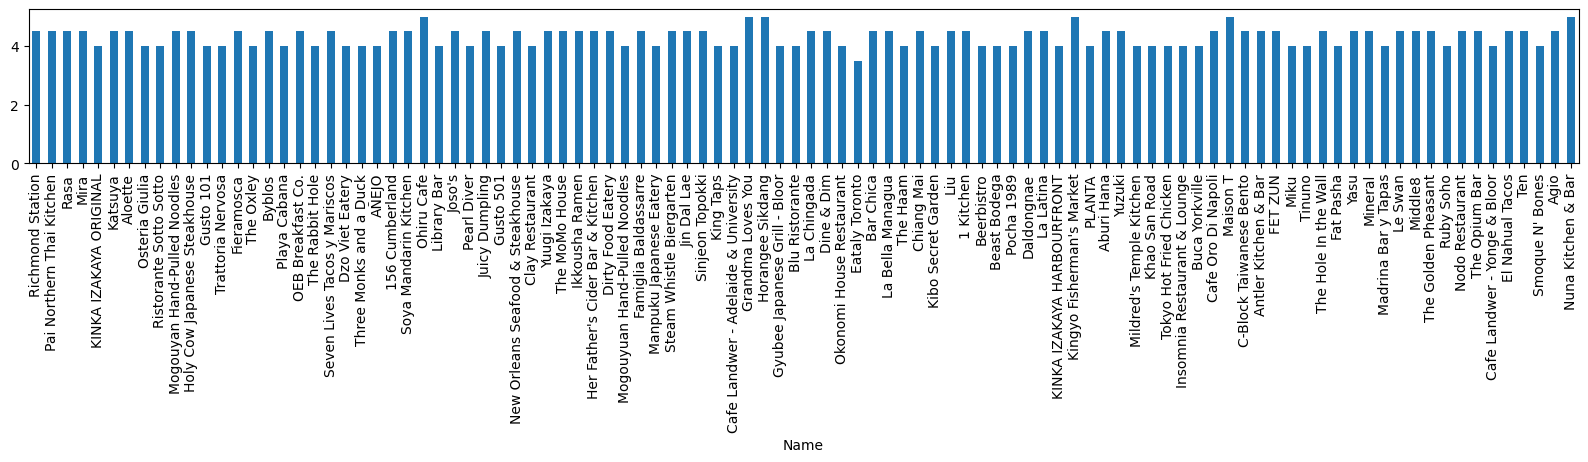

In [9]:
df.set_index("Name").plot(kind="bar", legend=False, figsize=(20, 2))
